In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

## plotting PRT slope over time

In [2]:
# load practice dataframe
prt_df = pd.read_pickle("./ex_data.pkl")
prt_df

,N0,PRT,agent,rewsize,rewsizeN0,trial
0,0.125,3,$Omniscient$,2,2.125,0
1,0.25,1,$Omniscient$,1,1.25,0
2,0.125,3,$Omniscient$,4,4.125,0
3,0.125,2,$Omniscient$,4,4.125,0
4,0.5,1,$Omniscient$,2,2.5,0
...,...,...,...,...,...,...
495,0.25,1,$Random$,2,2.25,500
496,0.5,1,$Random$,1,1.5,500
497,0.5,5,$Random$,2,2.5,500
498,0.25,1,$Random$,1,1.25,500


Text(0.5, 0.98, 'Agent performance over time')

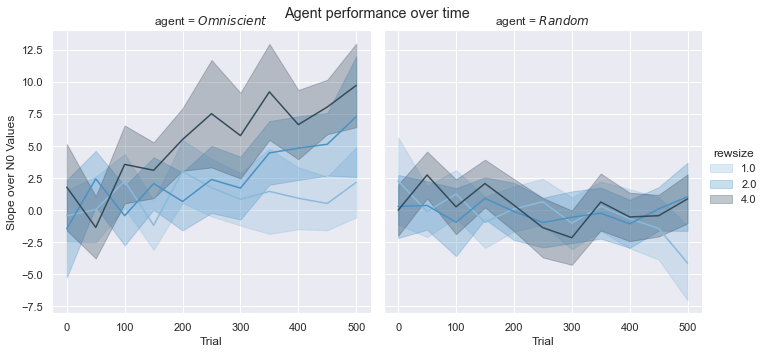

In [12]:
# oo regression baby
slopes_df = pd.DataFrame(columns = ["agent","trial","rewsize","slope","std_err"])

agents = prt_df["agent"].unique()
rewsizeN0_groups = np.split(np.sort(prt_df["rewsizeN0"].unique()),3)
rewsizes = np.sort(prt_df["rewsize"].unique())
trials = np.sort(prt_df["trial"].unique())

for agent in agents:
    slope_list = [] 
    std_err_list = []
    agent_df = prt_df[prt_df["agent"] == agent]
    trial_list = [] 
    rewsize_list = []
    for rewsize,rewsizeN0_group in zip(rewsizes,rewsizeN0_groups):
        for trial in trials:
            rewsizeN0_prt = agent_df[(agent_df["trial"] == trial) & (np.isin(agent_df["rewsizeN0"], rewsizeN0_group))][["rewsizeN0","PRT"]].to_numpy().astype("float64")
            slope, intercept, r_value, p_value, std_err = linregress(rewsizeN0_prt[:,0],rewsizeN0_prt[:,1])
            slope_list.append(slope)
            std_err_list.append(std_err)
            trial_list.append(trial)
            rewsize_list.append(rewsize)
    agent_list = [agent for i in range(len(slope_list))] 
    
    slopes_array = np.array((agent_list,trial_list,rewsize_list,slope_list,std_err_list)).T
    slopes_df = slopes_df.append(pd.DataFrame(slopes_array.copy(),columns = ["agent","trial","rewsize","slope","std_err"]),sort = True)
    
slopes_df[["slope","rewsize","trial","std_err"]] = slopes_df[["slope","rewsize","trial","std_err"]].astype("float64")
colors = [(0.5430834294502115, 0.733917723952326, 0.8593156478277586),
          (0.2818813276944765, 0.5707599641163655, 0.7754914776368064),
          (0.20442906574394465, 0.29301038062283735, 0.35649365628604385)]

# error plotting
slopes_df["minus"] = slopes_df["slope"] - 1.96 * slopes_df["std_err"]
slopes_df["plus"] = slopes_df["slope"] + 1.96 * slopes_df["std_err"]

sns.set()
# g = sns.relplot(x = "trial",y = "slope", col = "agent",kind = "line",hue = "rewsize",data = slopes_df, palette = colors)

g = sns.FacetGrid(data = slopes_df.sort_values("trial"), col="agent",hue = "rewsize", height=5,palette = colors)
g.map(plt.plot,"trial","slope")
g.map(plt.fill_between,"trial", "minus", "plus",alpha = .3).add_legend().set_ylabels("Slope over N0 Values").set_xlabels("Trial")
plt.suptitle("Agent Frequency Discrimination over time")


In [4]:
slopes_df[slopes_df["agent"]=="$Omniscient$"].sort_values(["trial"])

,agent,rewsize,slope,std_err,trial,minus,plus
0,$Omniscient$,1.0,-0.423121,1.018634,0.0,-2.419643,1.573400
22,$Omniscient$,2.0,1.806452,1.718680,0.0,-1.562162,5.175065
11,$Omniscient$,4.0,-1.434387,1.940433,0.0,-5.237636,2.368862
1,$Omniscient$,2.0,0.066105,1.307374,50.0,-2.496349,2.628558
23,$Omniscient$,4.0,-1.327265,1.235534,50.0,-3.748912,1.094381
12,$Omniscient$,1.0,2.465921,1.108702,50.0,0.292865,4.638976
2,$Omniscient$,4.0,2.283427,1.078459,100.0,0.169647,4.397206
24,$Omniscient$,1.0,3.585934,1.551056,100.0,0.545864,6.626003
13,$Omniscient$,2.0,-0.417414,1.182948,100.0,-2.735991,1.901164
3,$Omniscient$,1.0,-1.159287,0.978073,150.0,-3.076311,0.757737


In [38]:
for agent in agents:
    print(agent)

$Omniscient$
$Random$


In [62]:
from scipy import stats
import numpy as np
x = np.random.random(10000)
y = np.random.random(10000)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope,p_value,std_err)

0.01149072949496646 0.24916615910730533 0.009970747338016188


In [77]:
[[10,3] for i in range(4)]

[[10, 3], [10, 3], [10, 3], [10, 3]]

In [82]:
[10,3] * 10

[10, 3, 10, 3, 10, 3, 10, 3, 10, 3, 10, 3, 10, 3, 10, 3, 10, 3, 10, 3]

In [49]:
sns.color_palette("Blues_d")

[(0.20442906574394465, 0.29301038062283735, 0.35649365628604385),
 (0.20898116109188775, 0.38860438292964244, 0.5173343585800334),
 (0.21341022683583238, 0.4816147635524798, 0.6738280148660771),
 (0.2818813276944765, 0.5707599641163655, 0.7754914776368064),
 (0.41069332308086637, 0.6512213251313598, 0.8168294245802896),
 (0.5430834294502115, 0.733917723952326, 0.8593156478277586)]

## Plotting MVT comparison Figures

In [2]:
# load practice dataframe
mvt_df = pd.read_pickle("./ex_data.pkl")
mvt_df

,trial,timepoint,rew,instTrue,avgEst,instEst
0,0.0,0.0,1.8,1.800000,0.001800,0.36
1,0.0,1.0,-0.2,0.740025,0.001596,0.32
2,0.0,2.0,-0.2,0.629569,0.001393,0.28
3,0.0,3.0,-0.2,0.532092,0.001190,0.24
4,0.0,4.0,-0.2,0.446069,0.000988,0.20
...,...,...,...,...,...,...
6,999.0,6.0,-0.2,0.051580,0.124019,0.60
7,999.0,7.0,-0.2,0.022018,0.123571,0.60
8,999.0,8.0,-0.2,-0.004070,0.123124,0.20
9,999.0,9.0,-0.2,-0.027092,0.122678,-0.20


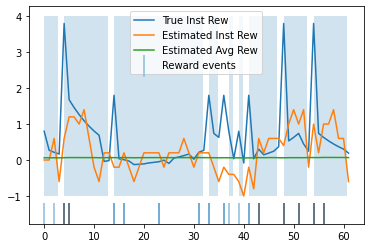

In [3]:
# this does not look right currently 
colors = [(0.5430834294502115, 0.733917723952326, 0.8593156478277586),
          (0.2818813276944765, 0.5707599641163655, 0.7754914776368064),
          (0.20442906574394465, 0.29301038062283735, 0.35649365628604385)]

trialRange = range(500,510)
trials_df = mvt_df[(np.isin(mvt_df["trial"], trialRange))].sort_values("trial")
x = range(len(trials_df))
plt.plot(x,trials_df["instTrue"],label = "True Inst Rew")
plt.plot(x,trials_df["instEst"],label = "Estimated Inst Rew")
plt.plot(x,trials_df["avgEst"],label = "Estimated Avg Rew")

rews = np.array(trials_df["rew"]) + .2
rew_idx = np.where(rews > 0)[0]
nonzero_rews = rews[rew_idx]
color_list = []
for i in range(len(nonzero_rews)):
    color_index = np.unique(nonzero_rews).tolist().index(nonzero_rews[i]) 
    color_list.append(colors[color_index])

rew_idx = np.where(rews>0)[0]
raster_loc = [-1.5 for i in range(len(rew_idx))]

plt.scatter(rew_idx,raster_loc,marker = "|",s = 500,color = color_list,label = "Reward events")
plt.legend()

timeptArray = np.array(trials_df["timepoint"])
# use plt.fill_between to signify different patches
plt.fill_between(np.arange(len(trials_df)*4)/4,-1,4,where = np.repeat(np.roll(timeptArray > 0,-1),4),alpha = .2)


In [122]:
# raster reward times,color by size
timeptArray = np.array(trials_df["timepoint"])
starts = np.where(timeptArray == 0)[0]
print(starts)
ends = list(starts[1:] - 1) + [len(timeptArray) - 1]
print(ends)

np.repeat(np.roll(timeptArray > 0,-1),2)


[ 0  4 14 33 36 37 39 41 48 54]
[3, 13, 32, 35, 36, 38, 40, 47, 53, 61]


array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])